In [2]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [3]:
import datapane as dp

In [4]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [5]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
json_data['total_players']

8240321

In [7]:
url = 'https://fantasy.premierleague.com/api/leagues-classic/872868/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,23277357,55,James Rivers,1,1,1,2552,1065573,Balsamic Vinagre
1,36423051,62,Ted Rosner,2,2,2,2497,260799,Grabban by Debuchy
2,38810568,60,George Baker Baker,3,3,3,2455,3962148,Warnocked Out
3,23483387,50,Pete Stebbing,4,4,4,2371,1591768,Diego Marrastebbo
4,30449535,73,Robert Shannon,5,6,5,2337,4811871,Abbeville Rovers
5,25060316,73,Sam Guest,6,7,6,2329,4032730,lads lads lads
6,38295560,50,A A,7,5,7,2328,4914782,Nanas Squad
7,23273307,59,Henry Elks,8,8,8,2315,1416663,Debbie Does Gallas
8,24183778,74,Leo Anthias,9,10,9,2312,3962240,OrigiASM
9,28025617,54,Henry Turnbull,10,9,10,2308,16866,Turnbull’s Revenge


In [8]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [9]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1824,3862562
1,2019/20,1898,3108475
2,2020/21,2328,259738


In [10]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

1065573 James Rivers Balsamic Vinagre
260799 Ted Rosner Grabban by Debuchy
3962148 George Baker Baker Warnocked Out
1591768 Pete Stebbing Diego Marrastebbo
4811871 Robert Shannon Abbeville Rovers
4032730 Sam Guest lads lads lads
4914782 A A Nanas Squad
1416663 Henry Elks Debbie Does Gallas
3962240 Leo Anthias OrigiASM
16866 Henry Turnbull Turnbull’s Revenge
1409005 Luke Betham Nanas Squad
1786332 Nick Sissling Fiddler on the Huth


In [11]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_all['player'] = df_all['player'].apply(lambda x: x.split()[0])

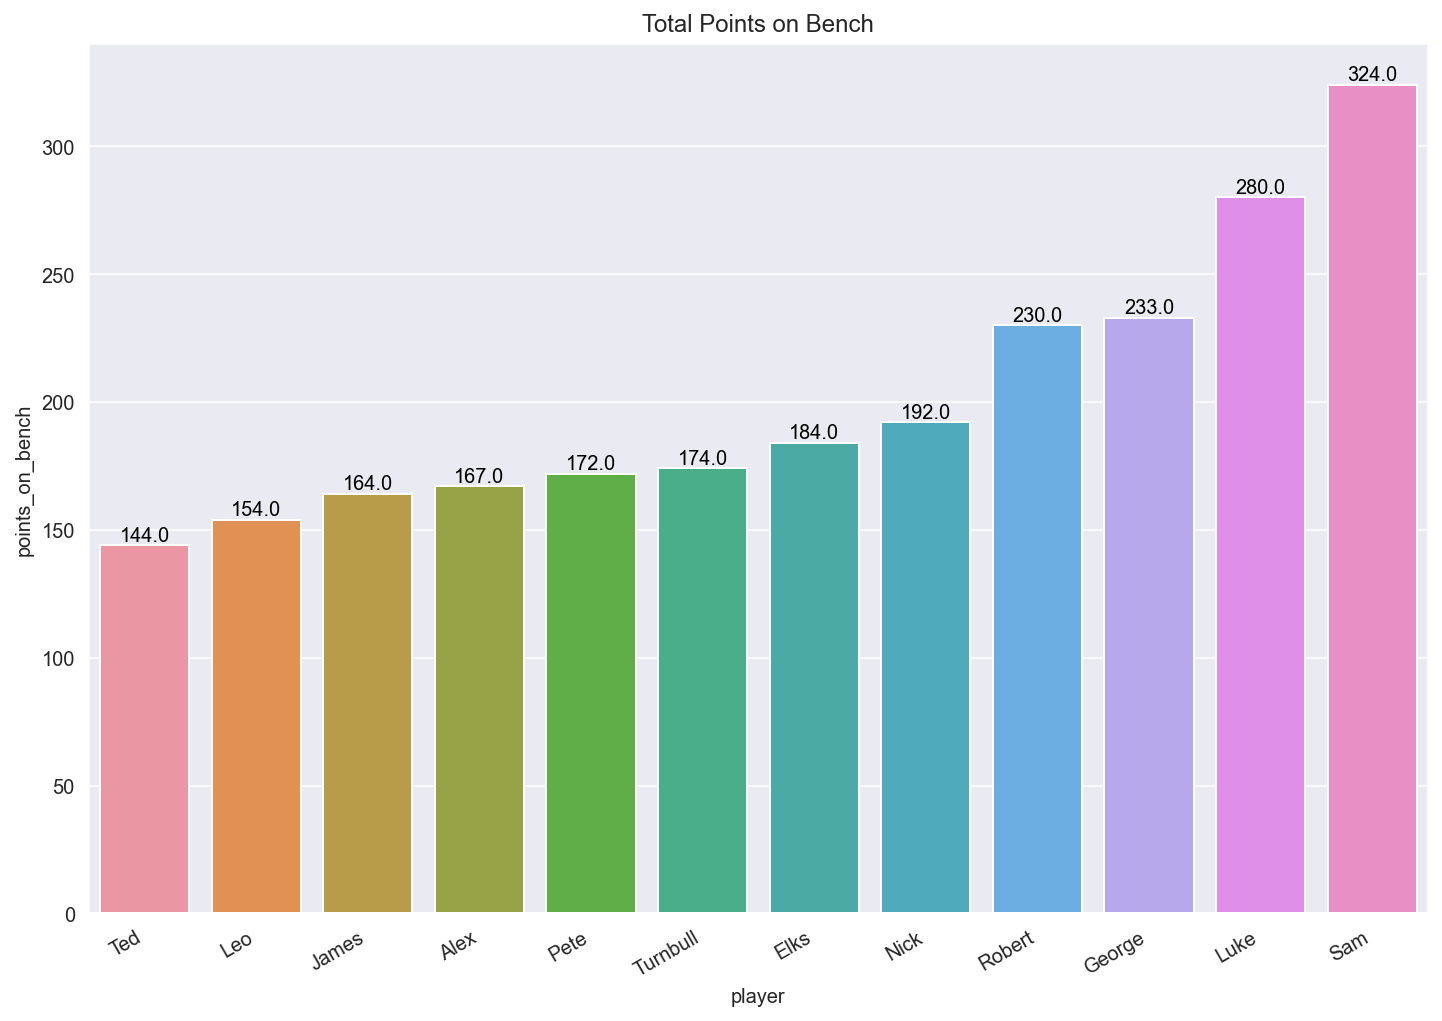

In [12]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

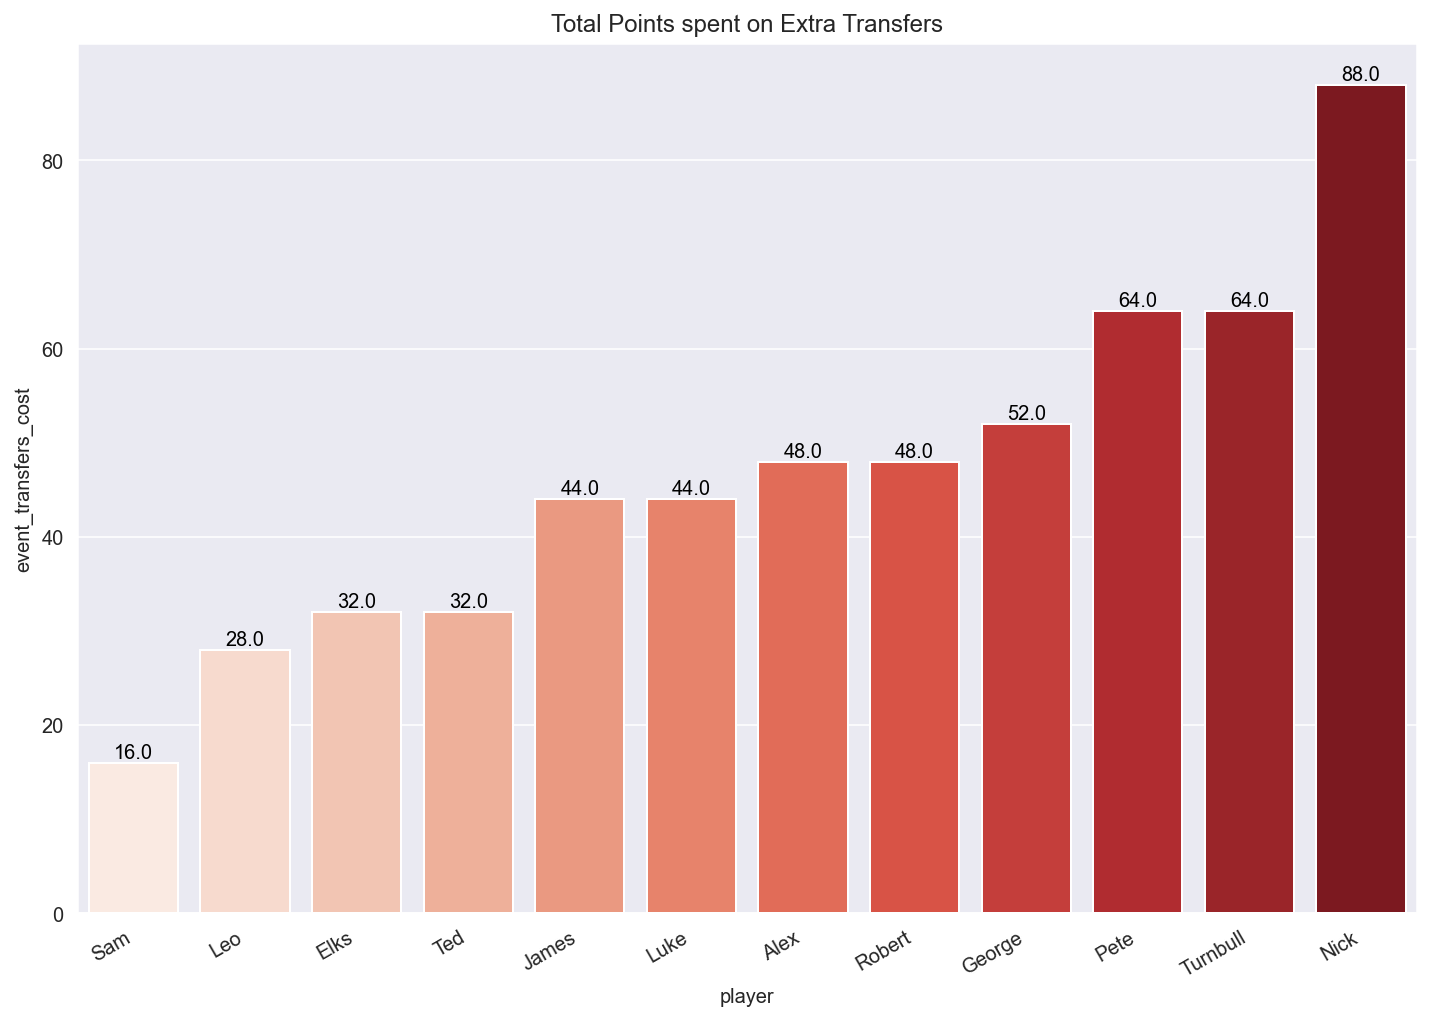

In [13]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
x_transfers = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index,palette='Reds')
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in x_transfers.patches:
    x_transfers.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

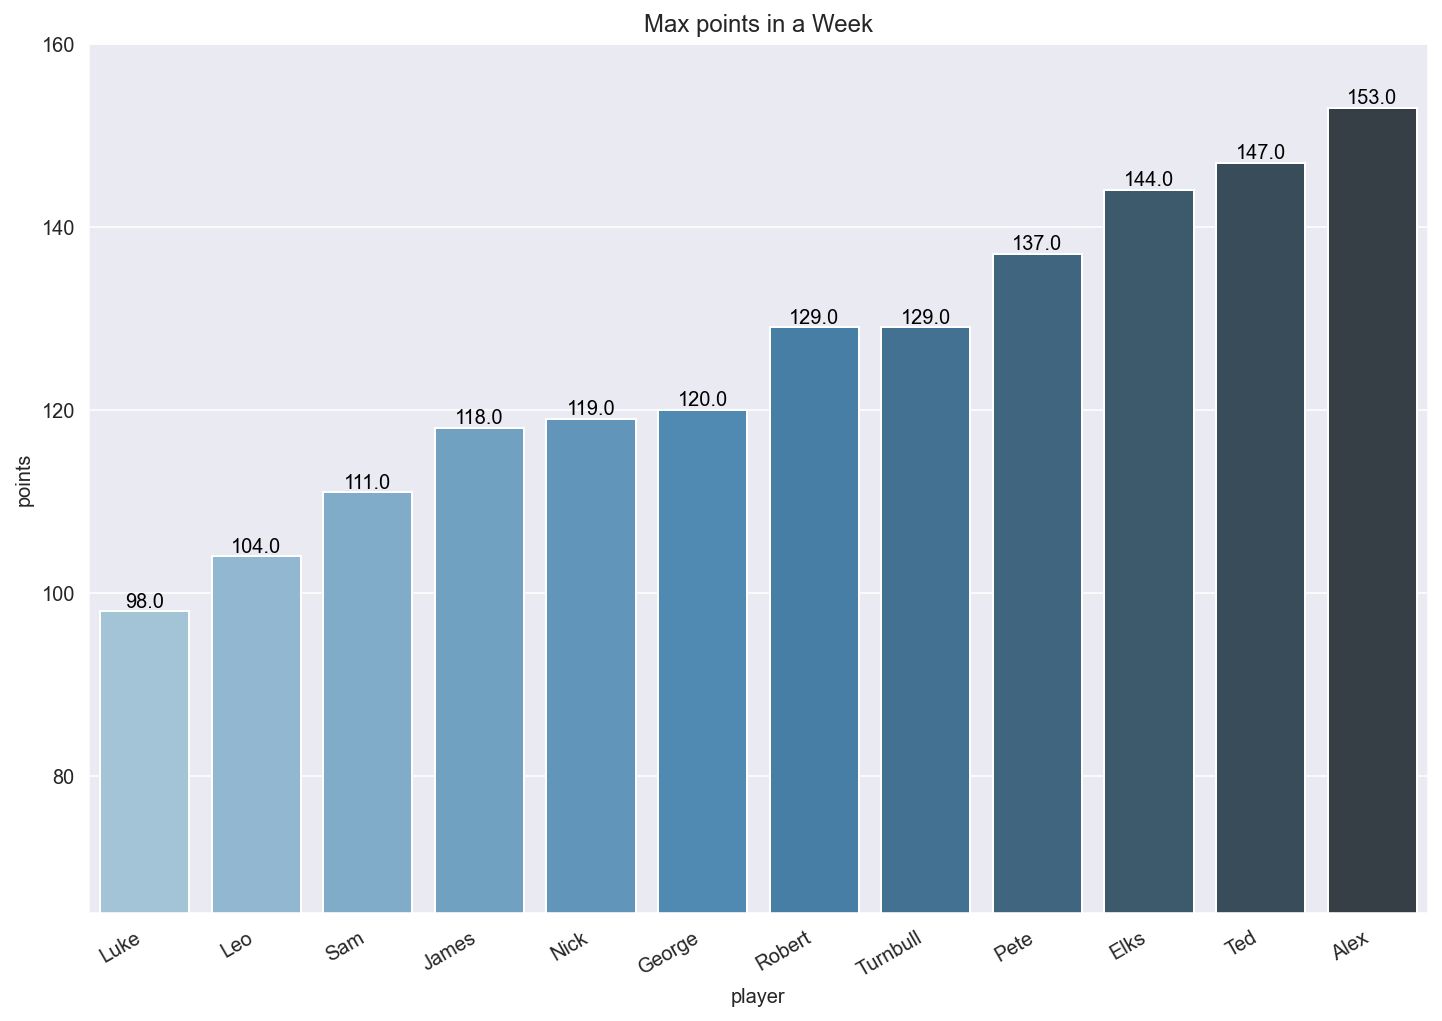

In [14]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
max_week = sns.barplot(y=df_temp.points,x=df_temp.index,palette='Blues_d')
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in max_week.patches:
    max_week.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(65,160)
plt.show()

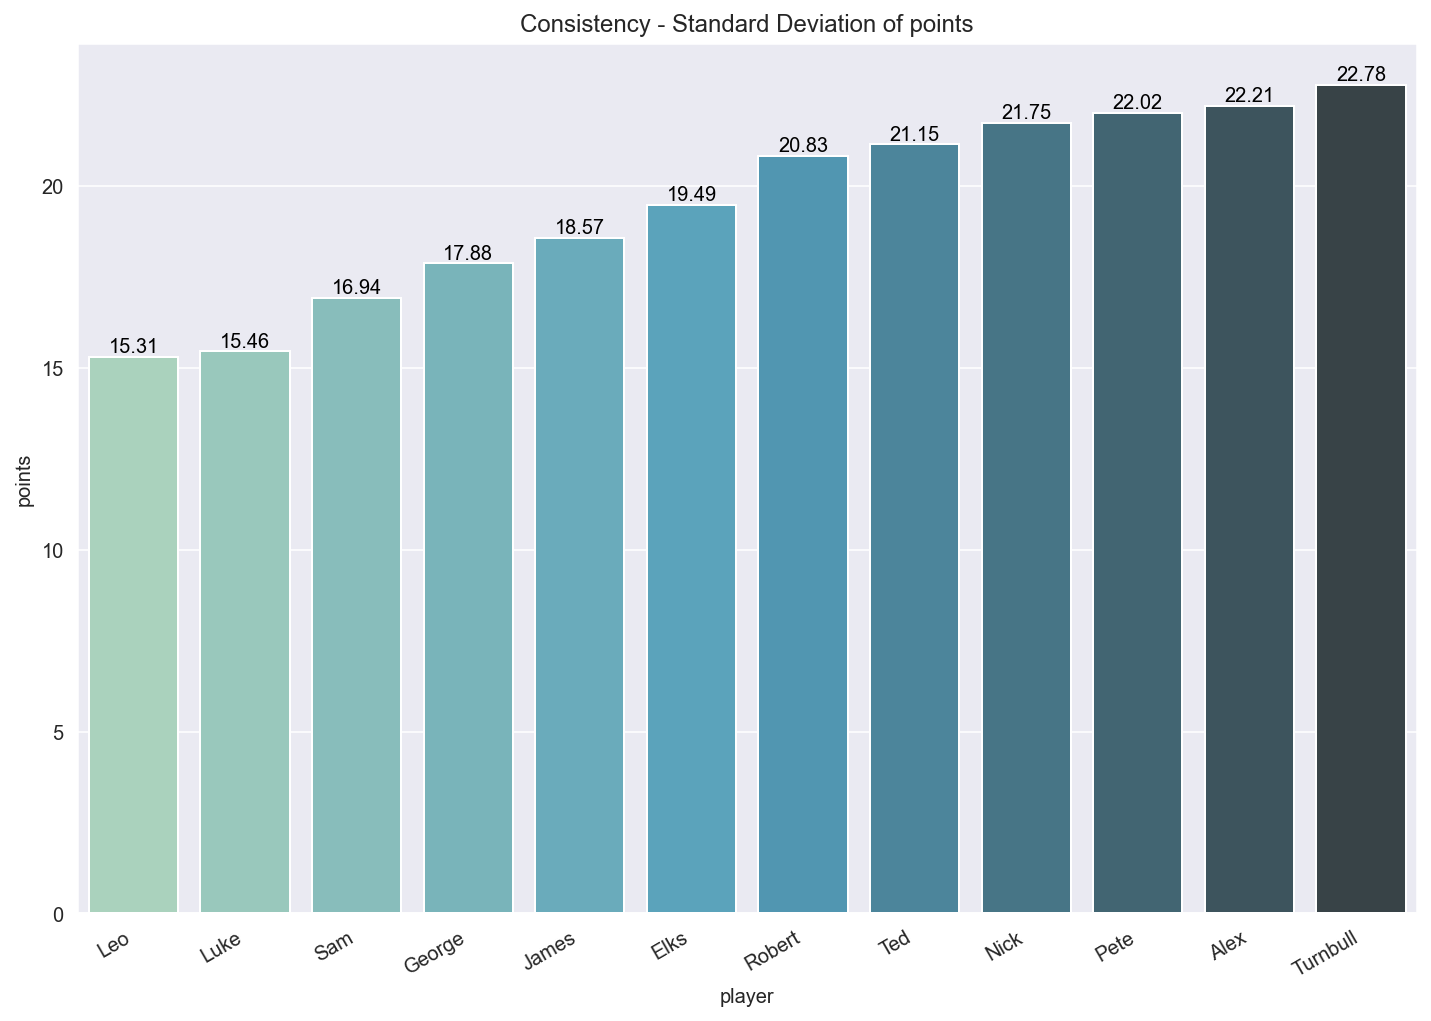

In [15]:
# Std dev points 
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
consistency=sns.barplot(y=df_temp.points,x=df_temp.index,palette="GnBu_d")
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in consistency.patches:
    consistency.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

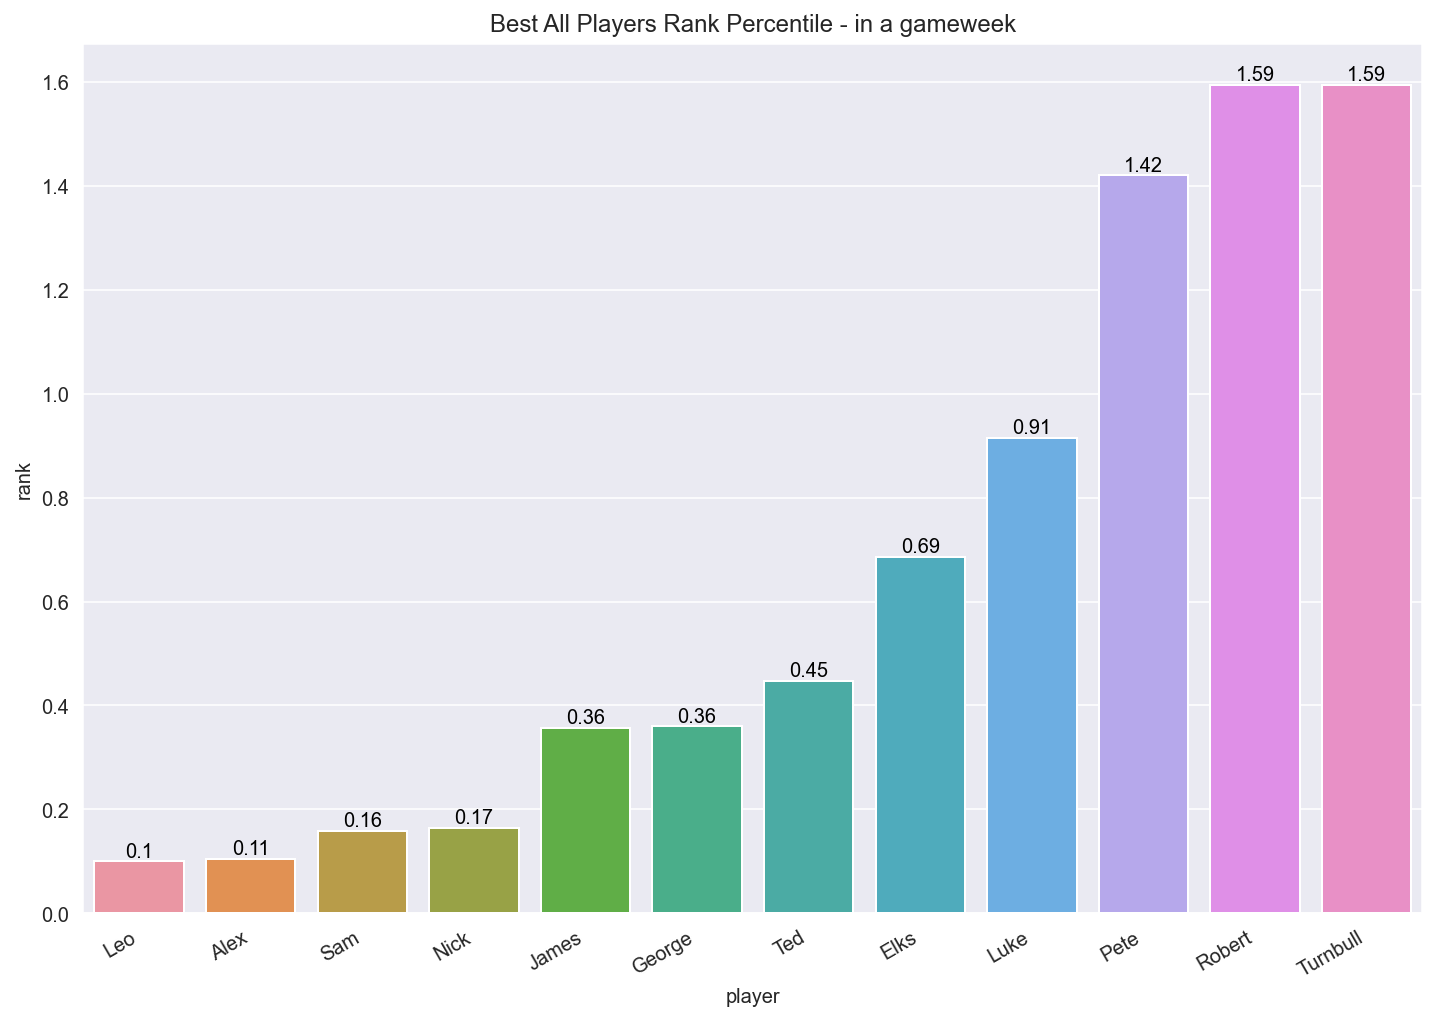

In [16]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

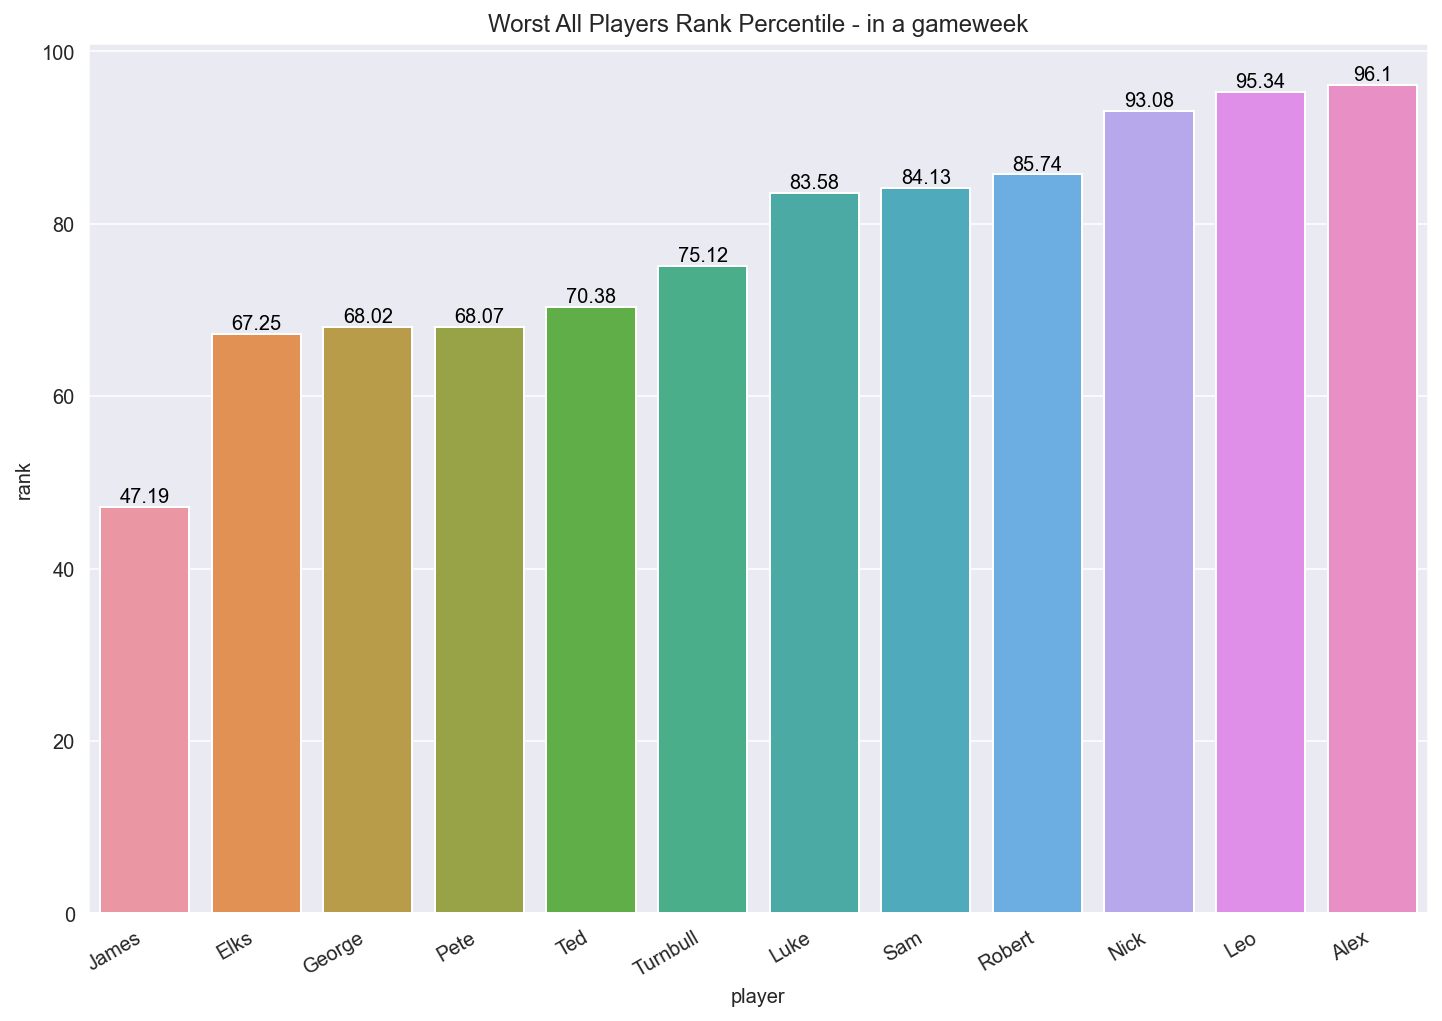

In [17]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

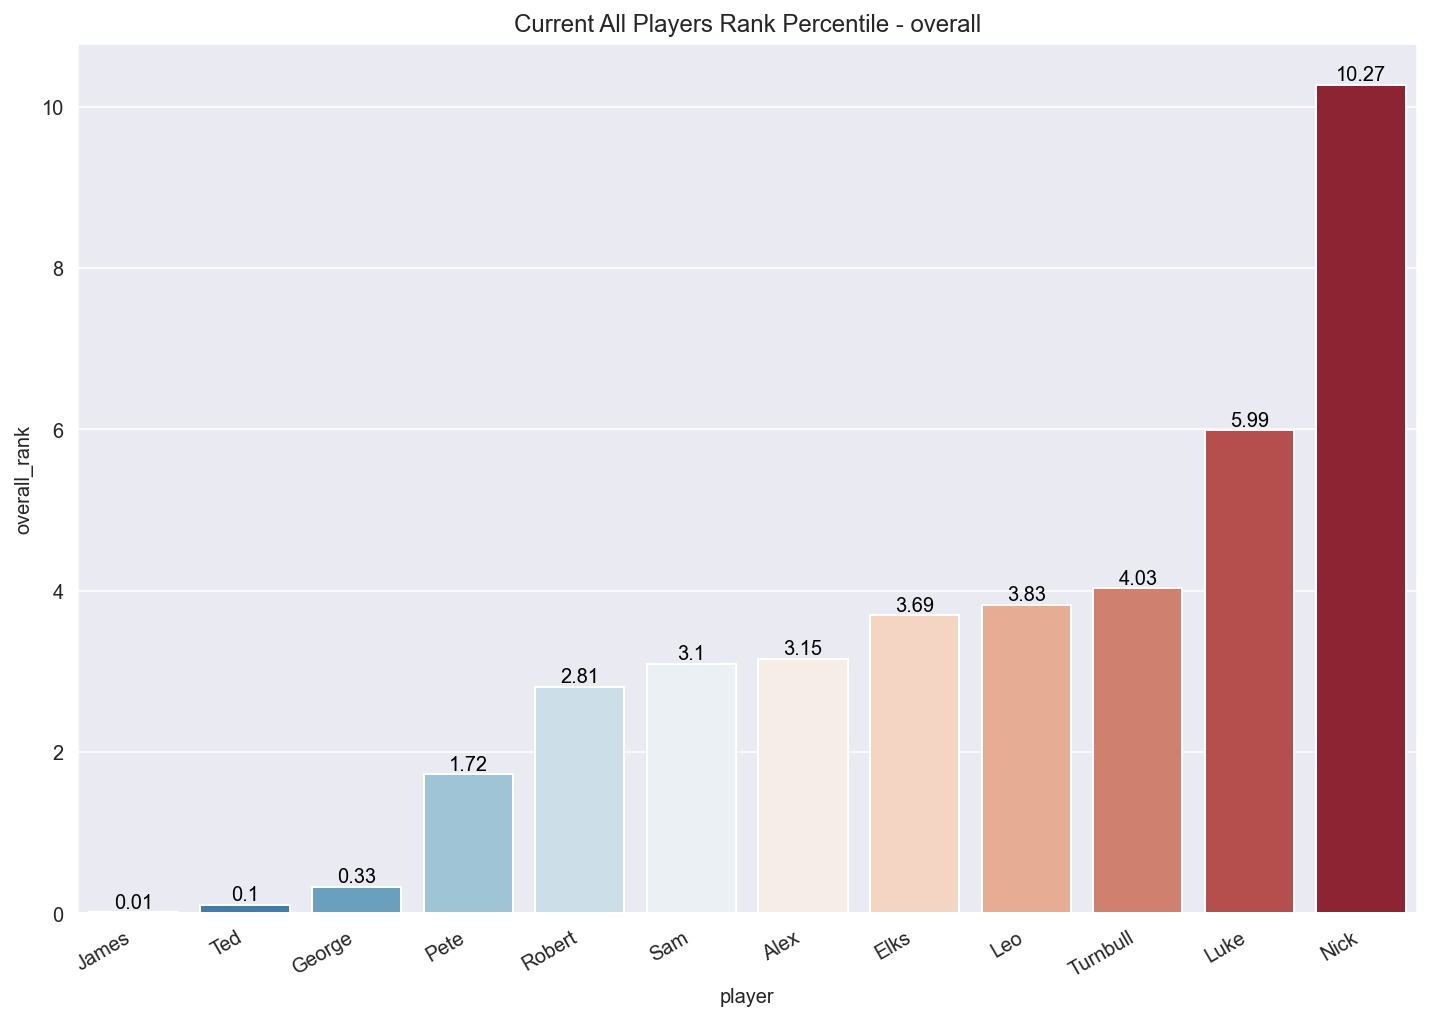

In [18]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
current_percentile = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player, palette = "RdBu_r")
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in current_percentile.patches:
    current_percentile.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

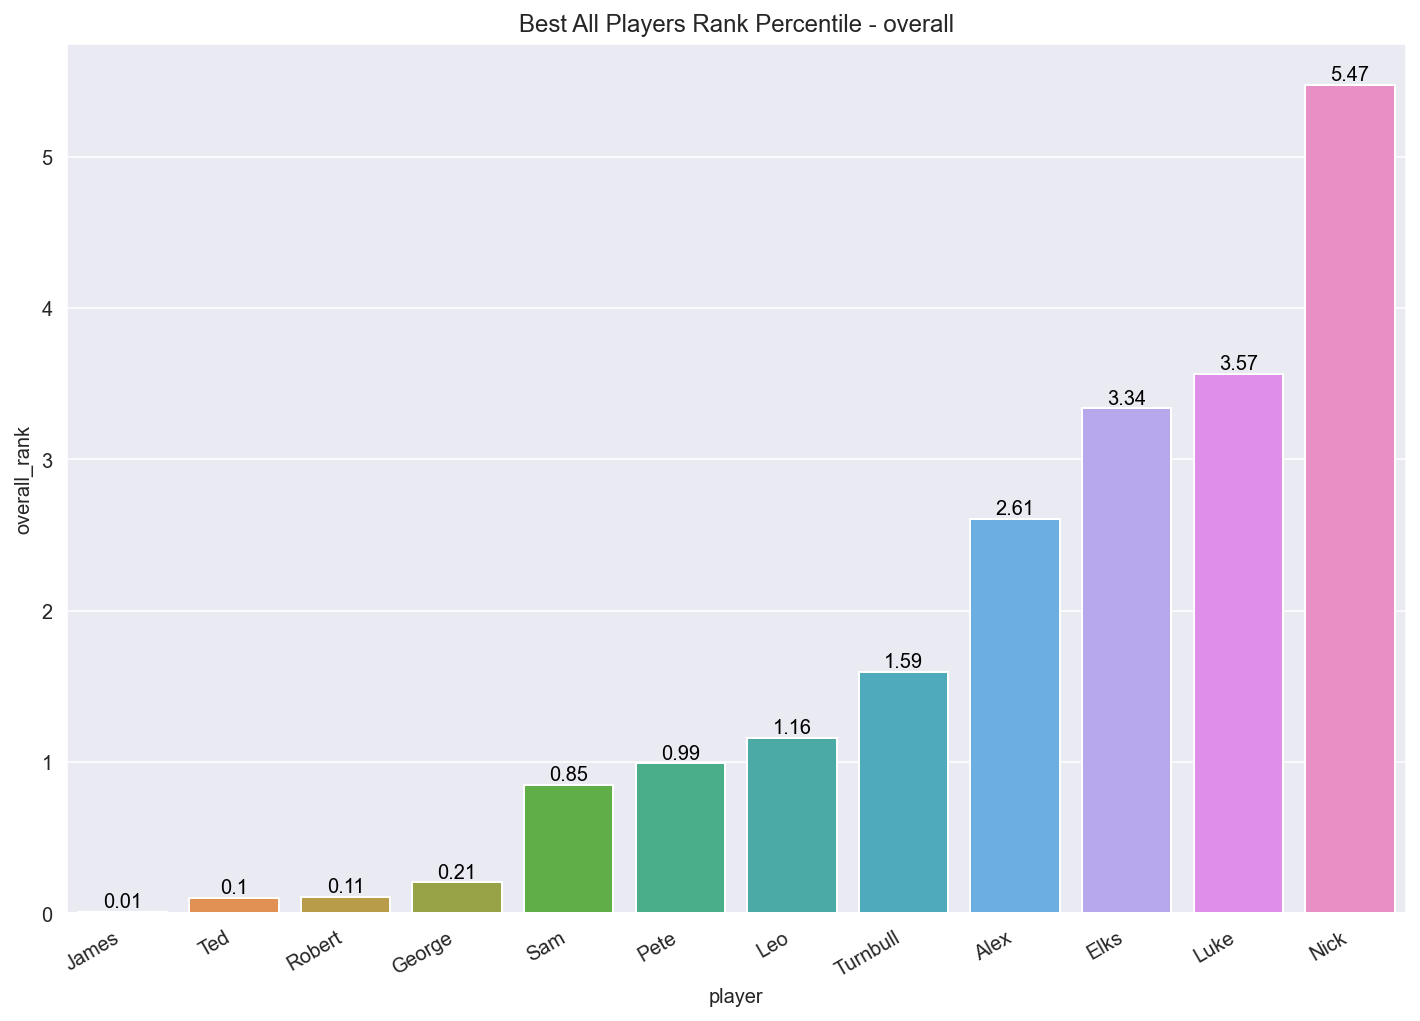

In [19]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

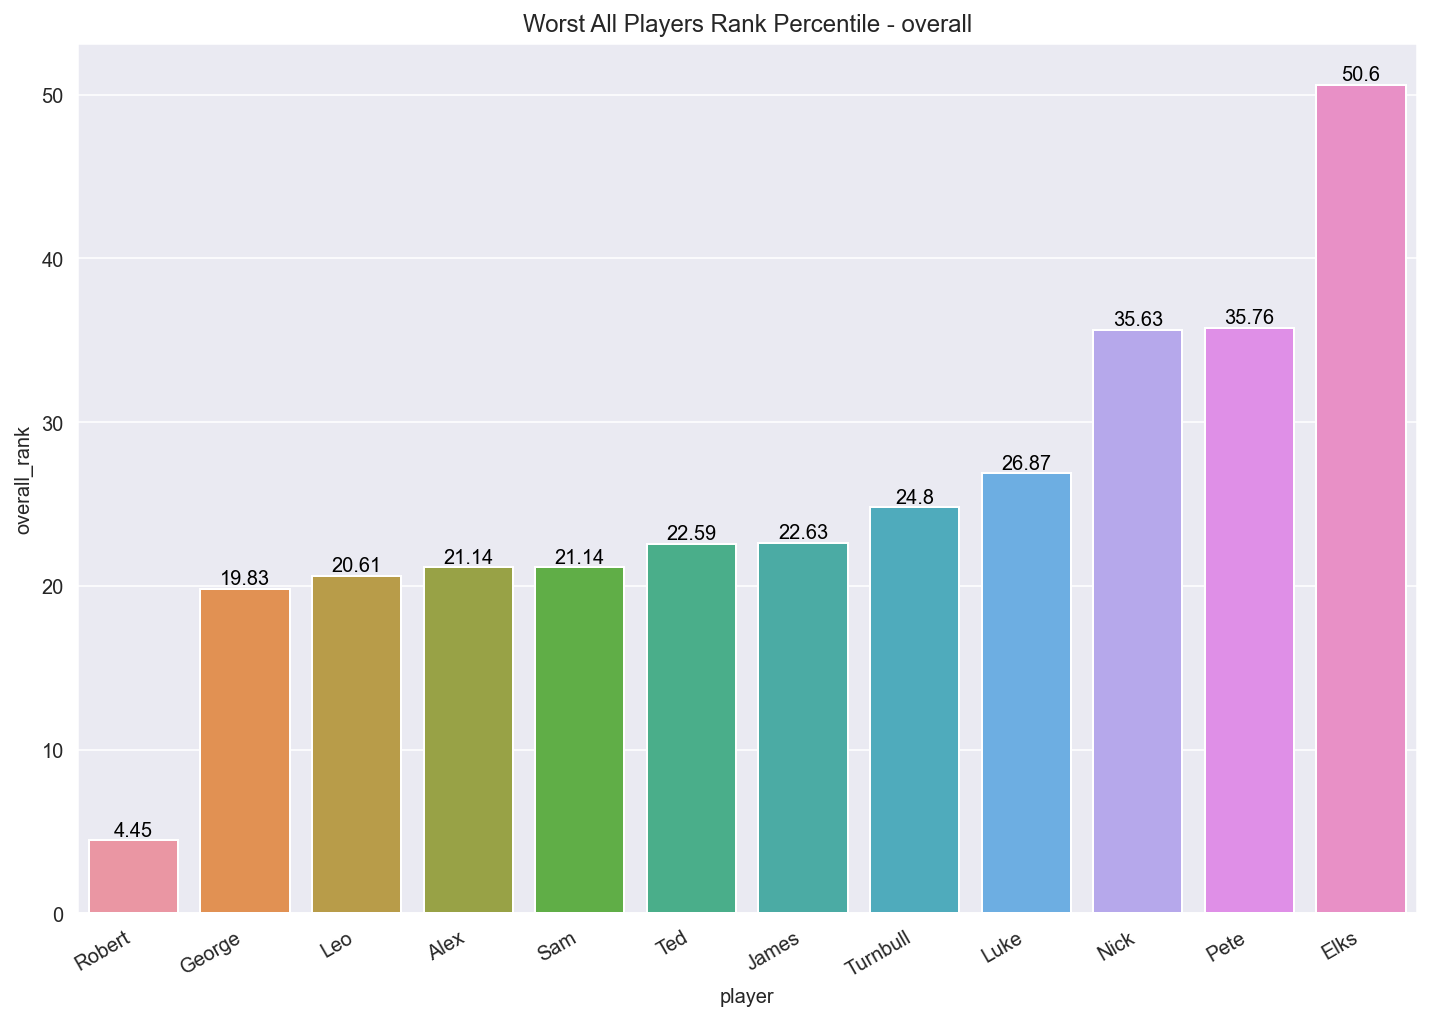

In [20]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [21]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [22]:
df_all['rankpw']=rank_list

In [23]:
df_all

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
0,1.0,68.0,68.0,984401.0,1000221.0,984401.0,5.0,1000.0,0.0,0.0,2.0,James,Balsamic Vinagre,9.0
0,1.0,53.0,53.0,2322243.0,2346876.0,2322243.0,5.0,1000.0,0.0,0.0,7.0,Elks,Debbie Does Gallas,12.0
0,1.0,79.0,79.0,333669.0,370955.0,333669.0,0.0,1000.0,0.0,0.0,1.0,Alex,Nanas Squad,3.0
0,1.0,86.0,86.0,131343.0,131508.0,131343.0,5.0,1000.0,0.0,0.0,4.0,Turnbull,Turnbull’s Revenge,1.0
0,1.0,75.0,75.0,525264.0,564260.0,525264.0,0.0,1000.0,0.0,0.0,2.0,Sam,lads lads lads,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,38.0,60.0,2455.0,1677476.0,1697202.0,27253.0,0.0,1074.0,2.0,4.0,7.0,George,Warnocked Out,3.0
37,38.0,62.0,2497.0,1313083.0,1314913.0,8401.0,0.0,1042.0,1.0,0.0,1.0,Ted,Grabban by Debuchy,2.0
37,38.0,55.0,2552.0,2724161.0,2732821.0,1183.0,25.0,1073.0,1.0,0.0,8.0,James,Balsamic Vinagre,1.0
37,38.0,37.0,2271.0,6887218.0,6889271.0,493454.0,11.0,1030.0,2.0,0.0,1.0,Luke,Nanas Squad,11.0


In [24]:
df_all[df_all.event==2].sort_values('total_points',ascending=False).total_points.iloc[8]

120.0

In [25]:
dist_list = []
for e in df_all.event.unique():
    dist_list+=(df_all[df_all.event==e].total_points - df_all[df_all.event==e].total_points.max()).tolist()

In [26]:
df_all['distpw_from_first'] = dist_list

In [27]:
dist_list9 = []
for e in df_all.event.unique():
    dist_list9+=(df_all[df_all.event==e].total_points - df_all[df_all.event==e].sort_values('total_points',ascending=False).total_points.iloc[8]).tolist()
df_all['distpw_from_ninth'] = dist_list9


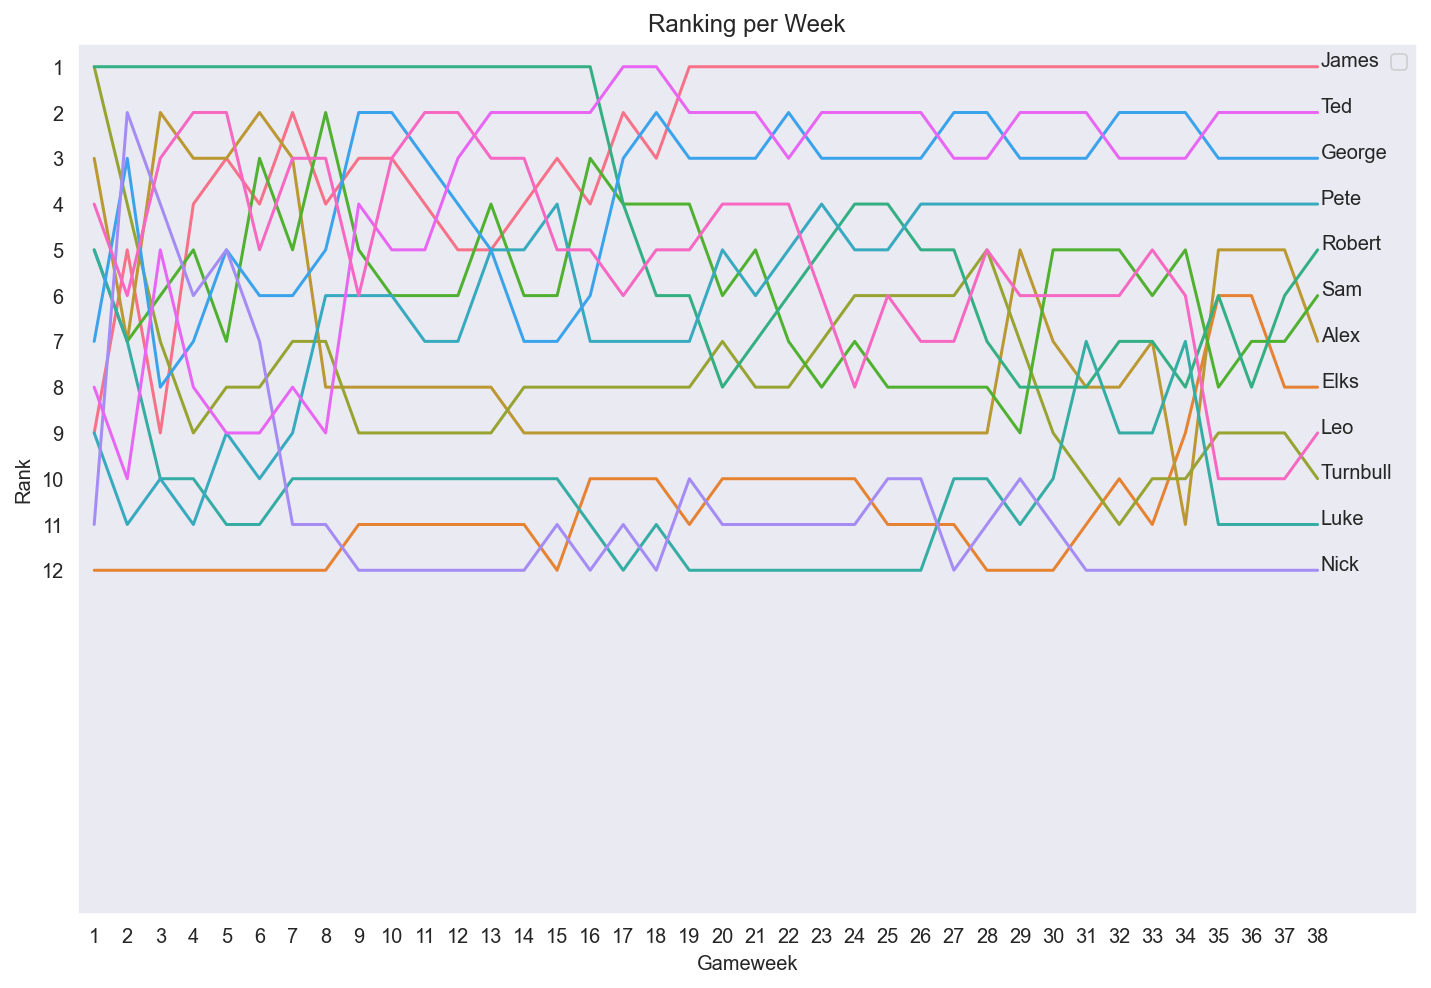

In [28]:
# create rank plot
gw = int(df_all.event.max())
curr_rank_list = df_all[df_all.event==gw].sort_values("total_points",ascending=False)["player"].tolist()
sns.set_style('dark')
plt.figure(figsize=(12,8))
ranking=sns.lineplot(y=df_all.rankpw,x=df_all.event,hue=df_all.player)
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(gw+0.1,i+1))
plt.yticks(range(1,13))
plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)
plt.ylim(19.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

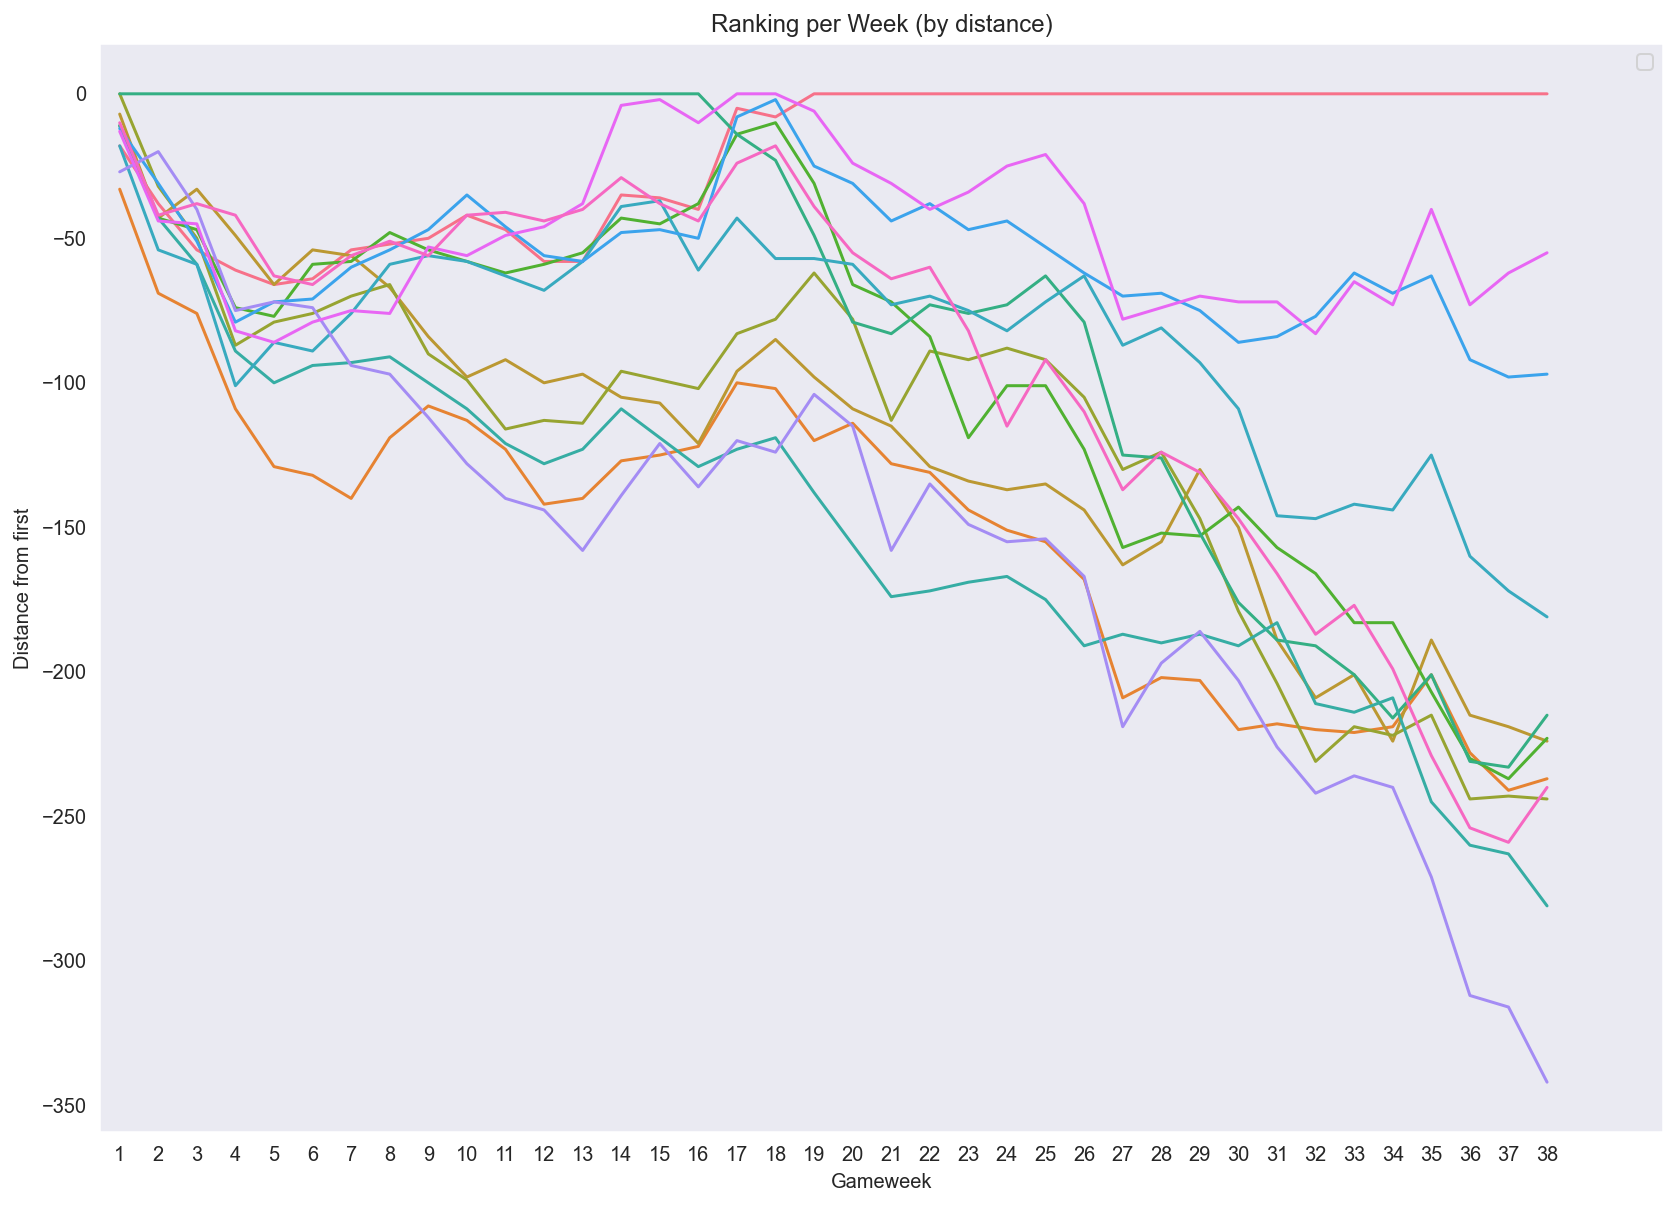

In [28]:
# create dist plot
gw = int(df_all.event.max())
curr_dist = df_all[df_all.event==gw].sort_values("total_points",ascending=False)[["player","distpw_from_first"]]
sns.set_style('dark')
plt.figure(figsize=(14,10))
dist_first=sns.lineplot(y=df_all.distpw_from_first,x=df_all.event,hue=df_all.player)

# for row in curr_dist.index:
#     print(row)
#     ranking.annotate(name,(gw+0.1,i+1))

plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)

plt.title("Ranking per Week (by distance)")
plt.xlabel("Gameweek")
plt.ylabel("Distance from first")
plt.legend("")
plt.show()

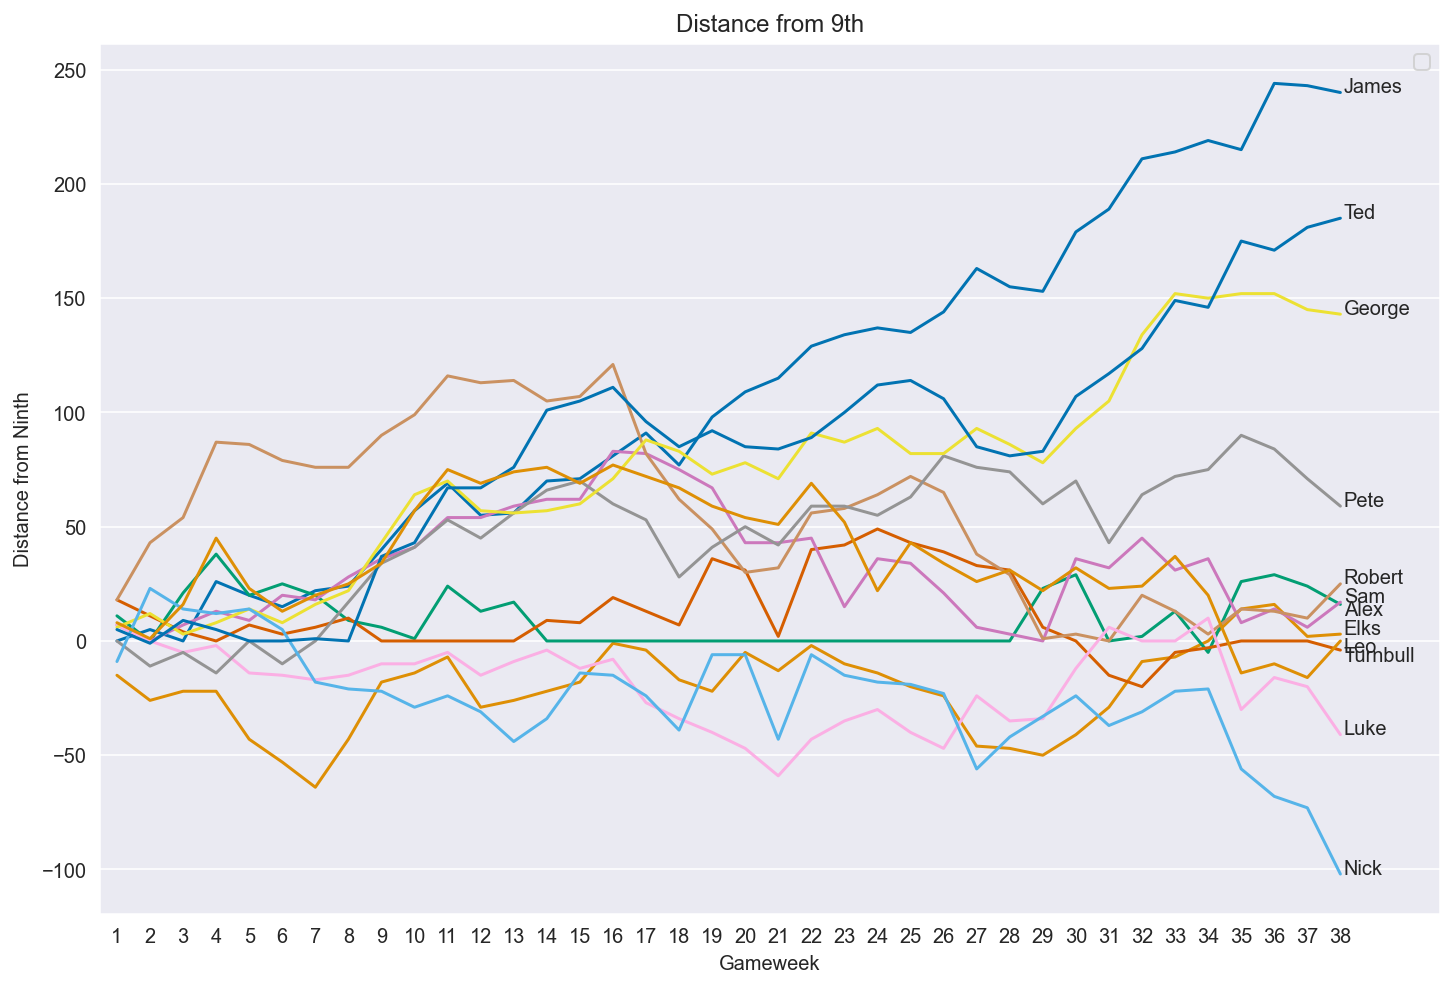

In [29]:
# create dist plot
gw = int(df_all.event.max())
curr_dist = df_all[df_all.event==gw].sort_values("total_points",ascending=False)[["player","distpw_from_ninth"]]
sns.set_style('dark')
plt.figure(figsize=(12,8))
dist_9th=sns.lineplot(y=df_all.distpw_from_ninth,x=df_all.event,hue=df_all.player,palette="colorblind")

last = 1000
for i in range(len(curr_dist)):
    if last - curr_dist.iloc[i,1] < 5:
        dist_9th.annotate(curr_dist.iloc[i,0],(gw+0.1,curr_dist.iloc[i,1]-5))
    else:
        dist_9th.annotate(curr_dist.iloc[i,0],(gw+0.1,curr_dist.iloc[i,1]))
    last = curr_dist.iloc[i,1]

plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)

plt.title("Distance from 9th")
plt.xlabel("Gameweek")
plt.ylabel("Distance from Ninth")
plt.legend("")
plt.grid(axis = "y")
plt.show()

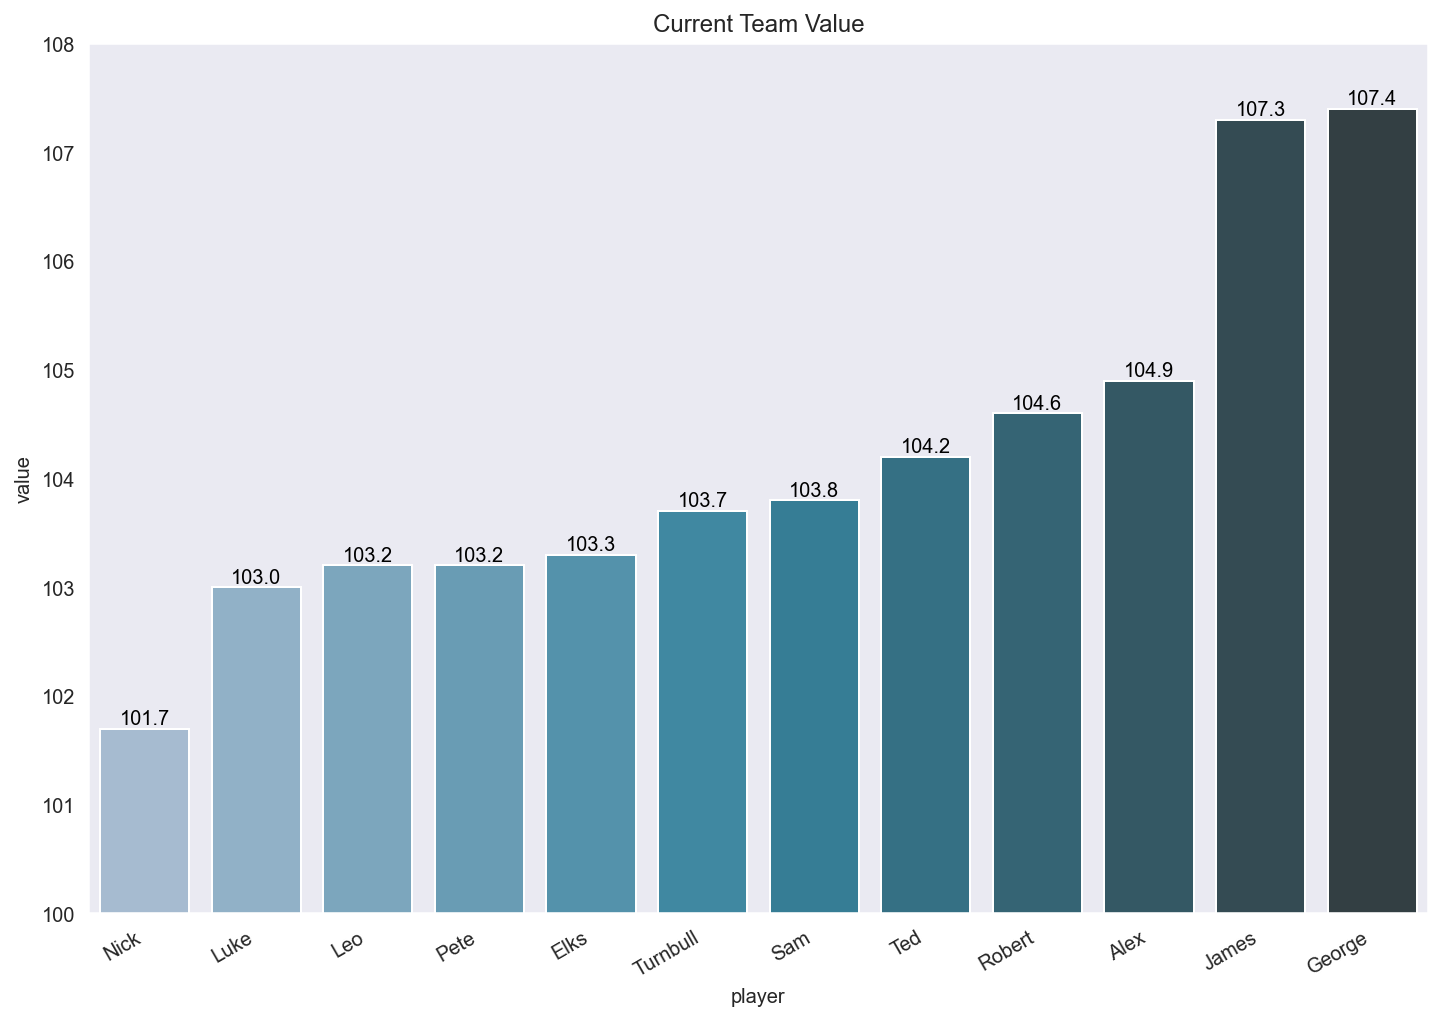

In [30]:
# Current team value
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
team_value = sns.barplot(y=df_temp['value']/10,x=df_temp.player,palette='PuBuGn_d')
plt.title("Current Team Value")
plt.xticks(rotation=30,ha="right")
for p in team_value.patches:
    team_value.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(100,108)
plt.show()

## Looking at ownership

In [31]:
#Formatting names
df_league['player'] = df_league['player_name'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_league['player'] = df_league['player'].apply(lambda x: x.split()[0])

In [32]:
#Looping through and creating a df of the leagues picks
for row in df_league.index:
    url = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/".format(df_league.iloc[row,7],gw)
    r = requests.get(url)
    picks = r.json()
    if row == 0:
        df_picks = pd.DataFrame(picks['picks'])
        df_picks['player'] = df_league.iloc[row,-1]
    else:
        df_temp = pd.DataFrame(picks['picks'])
        df_temp['player'] = df_league.iloc[row,-1]
        df_picks = pd.concat([df_picks,df_temp])

In [33]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json_data = r.json()
player_df = pd.DataFrame(json_data['elements'])
teams_df = pd.DataFrame(json_data['teams'])
player_df.team = player_df.team.map(pd.Series(teams_df.name.values,teams_df.id).to_dict())

In [34]:
df_picks['web_name'] = df_picks.element.map(pd.Series(player_df.web_name.values,player_df.id).to_dict())
df_picks['team']=df_picks.element.map(pd.Series(player_df.team.values,player_df.id).to_dict())

In [35]:
df_picks.head()

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
0,548,1,1,False,False,James,Mendy,Chelsea
1,259,2,1,False,False,James,Alexander-Arnold,Liverpool
2,200,3,1,False,False,James,Dallas,Leeds
3,255,4,1,False,False,James,Robertson,Liverpool
4,203,5,1,False,False,James,Harrison,Leeds


In [36]:
df_EO = df_picks.groupby(["web_name","team"])[['multiplier']].sum()/len(df_league.index)*100
df_EO = df_EO.reset_index()
df_EO = df_EO[df_EO.multiplier>1/len(df_league.index)*100]
df_EO = df_EO.sort_values(by='multiplier',ascending=False)

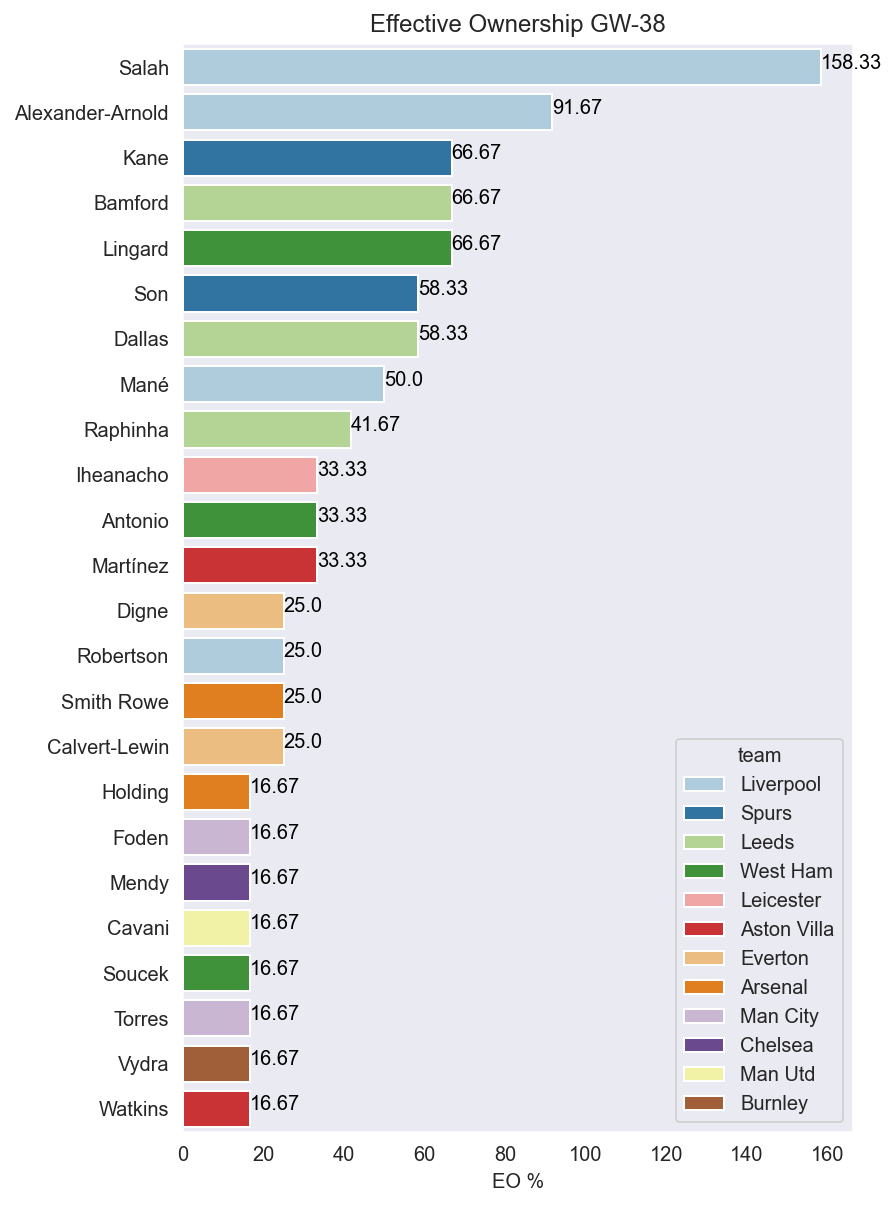

In [37]:
plt.figure(figsize=(6,10))
EO_plot = sns.barplot(y=df_EO.web_name,x=df_EO.multiplier,hue=df_EO.team,dodge=False,palette='Paired')
plt.title("Effective Ownership GW-{}".format(gw))
plt.xlabel("EO %")
plt.ylabel("")
for p in EO_plot.patches:
    EO_plot.annotate(round(p.get_width(),2), (p.get_width(),p.get_y()+p.get_height()/1.5),
     ha='left', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [38]:
df_picks[df_picks.web_name == "Salah"]

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
5,254,6,2,True,False,James,Salah,Liverpool
4,254,5,2,True,False,Ted,Salah,Liverpool
6,254,7,2,True,False,George,Salah,Liverpool
6,254,7,1,False,True,Pete,Salah,Liverpool
5,254,6,2,True,False,Robert,Salah,Liverpool
6,254,7,2,True,False,Alex,Salah,Liverpool
7,254,8,2,True,False,Elks,Salah,Liverpool
4,254,5,1,False,True,Leo,Salah,Liverpool
5,254,6,2,True,False,Turnbull,Salah,Liverpool
6,254,7,2,True,False,Luke,Salah,Liverpool


In [39]:
# Cheeky differentials
df_diff = df_picks.groupby(["web_name"])[['multiplier']].sum()
df_diff = df_diff[df_diff.multiplier==1]
df_diff = df_diff.reset_index()
df_diff['player'] = df_diff.web_name.map(pd.Series(df_picks[df_picks.multiplier!=0].player.values,df_picks[df_picks.multiplier!=0].web_name).to_dict())
df_diff.drop('multiplier',inplace=True,axis=1)
df_diff.columns = ["Rogue Choice", "Manager"]
df_diff = df_diff.sort_values('Manager')
df_diff = df_diff.set_index('Manager')

In [40]:
df_diff

,Rogue Choice
Manager,
Alex,Struijk
Elks,Coufal
Elks,Guaita
Elks,Reguilón
James,Harrison
Leo,Tierney
Leo,Casilla
Leo,Castagne
Luke,Adarabioyo


In [41]:
player_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,...,713,295,713,295,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,...,667,238,685,240,NaN,,NaN,,NaN,
2,100.0,50.0,41270,0,0,-1,1,0,2,0.3,...,241,69,309,105,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-7,7,3,3,4.5,...,36,20,55,31,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.5,...,328,109,356,125,NaN,,5.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,NaN,NaN,448487,0,0,0,0,0,1,-0.5,...,512,33,563,63,NaN,,NaN,,NaN,
709,0.0,0.0,209353,0,0,-1,1,0,4,0.0,...,435,68,510,70,NaN,,NaN,,NaN,
710,NaN,NaN,465551,0,0,-1,1,0,2,-0.5,...,476,184,531,194,NaN,,NaN,,NaN,
711,100.0,100.0,73314,0,0,-2,2,0,4,0.5,...,155,43,282,40,NaN,,NaN,,NaN,


In [42]:
# Captaining error

#LoopThrough league managers

    #Loop through gws
        #Loop through active players
url = "https://fantasy.premierleague.com/api/entry/1409005/event/28/picks/"
r = requests.get(url)
picks = r.json()
df_temp3 = pd.DataFrame(picks['picks']) 
df_temp3
# for player in df_temp3.element:
# load player history - link to fixtures to find gw and then look back up in player history
#compare all multiplier 1 to multiplier 2 - if no multiplier 2 then max


,element,position,multiplier,is_captain,is_vice_captain
0,417,1,1,False,False
1,277,2,1,False,False
2,155,3,1,False,False
3,376,4,1,False,False
4,200,5,1,False,False
5,370,6,1,False,False
6,390,7,1,False,False
7,302,8,1,False,False
8,202,9,1,False,False
9,514,10,1,False,False


In [43]:
url = "https://fantasy.premierleague.com/api/element-summary/273/"
r = requests.get(url)
json_data = r.json()
pd.DataFrame(json_data['history'])

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,273,18,20,2,False,2020-09-21T19:15:00Z,1,3,2,90,...,14,20.2,0.3,0.0,2.1,50,-502,28676,2022,2524
1,273,24,9,0,True,2020-09-27T15:30:00Z,2,5,3,0,...,0,0.0,0.0,0.0,0.0,50,7191,42615,12556,5365
2,273,33,10,0,False,2020-10-03T16:30:00Z,1,1,4,0,...,0,0.0,0.0,0.0,0.0,50,-5411,38156,2200,7611
3,273,44,1,0,True,2020-10-17T16:30:00Z,1,0,5,0,...,0,0.0,0.0,0.0,0.0,50,-5594,34380,1052,6646
4,273,57,19,0,False,2020-10-24T11:30:00Z,1,1,6,0,...,0,0.0,0.0,0.0,0.0,49,-2587,32933,1244,3831
5,273,66,15,0,False,2020-10-31T12:30:00Z,0,1,7,0,...,0,0.0,0.0,0.0,0.0,49,-2334,31388,842,3176
6,273,75,11,0,True,2020-11-08T16:30:00Z,1,1,8,0,...,0,0.0,0.0,0.0,0.0,49,-2075,29738,611,2686
7,273,87,17,0,False,2020-11-21T17:30:00Z,2,0,9,0,...,0,0.0,0.0,0.0,0.0,48,-1243,29191,640,1883
8,273,95,4,6,True,2020-11-28T15:00:00Z,5,0,10,90,...,30,29.6,11.9,8.0,5.0,48,-536,29101,695,1231
9,273,104,8,6,True,2020-12-05T15:00:00Z,2,0,11,90,...,26,21.4,2.4,0.0,2.4,48,5046,35643,6245,1199


In [44]:
df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name,player
0,23277357,55,James Rivers,1,1,1,2552,1065573,Balsamic Vinagre,James
1,36423051,62,Ted Rosner,2,2,2,2497,260799,Grabban by Debuchy,Ted
2,38810568,60,George Baker Baker,3,3,3,2455,3962148,Warnocked Out,George
3,23483387,50,Pete Stebbing,4,4,4,2371,1591768,Diego Marrastebbo,Pete
4,30449535,73,Robert Shannon,5,6,5,2337,4811871,Abbeville Rovers,Robert
5,25060316,73,Sam Guest,6,7,6,2329,4032730,lads lads lads,Sam
6,38295560,50,A A,7,5,7,2328,4914782,Nanas Squad,Alex
7,23273307,59,Henry Elks,8,8,8,2315,1416663,Debbie Does Gallas,Elks
8,24183778,74,Leo Anthias,9,10,9,2312,3962240,OrigiASM,Leo
9,28025617,54,Henry Turnbull,10,9,10,2308,16866,Turnbull’s Revenge,Turnbull


In [45]:
## Publishing to datapane

In [46]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### LukeStepsUp FPL League',
    f'Graphing the most important league in FPL',
    
    dp.Select(blocks=[
        dp.Plot(ranking,responsive=False, label='Ranking'),
        dp.Plot(dist_9th,responsive=False, label='Battle for Ninth'),
        dp.Plot(EO_plot,responsive=False, label='E.O.'),
        dp.Table(df_diff, label='Cheeky Differentials'),
    ]),
    dp.Select(blocks=[
        dp.Plot(bench_chart,responsive=False, label='Points on Bench'),
        dp.Plot(x_transfers,responsive=False, label='Hits'),
        dp.Plot(max_week,responsive=False, label='Biggest Week'),
        dp.Plot(consistency,responsive=False, label='Consistency'),
        dp.Plot(current_percentile,responsive=False, label='Current %'),
        dp.Plot(team_value,responsive=False, label='Team Value')],type=dp.SelectType.TABS)
    
)

Connected successfully to https://datapane.com as lukebetham


Bokeh version 2.3.0 is not supported, your plots may not display correctly, please install version ~=2.2.0


In [47]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
data = dp.Report(
    f'### LukeStepsUp FPL League - data',
    dp.DataTable(df_all)
)

Connected successfully to https://datapane.com as lukebetham


In [48]:
r.publish(name=f'FPL League Rankings', open=True, description=f'')

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/lukebetham/reports/fpl-league-rankings/ - you can edit and add additional text from the link

In [49]:
data.publish(name=f'LukeStepsUp Data', open=True, description=f'')

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/lukebetham/reports/lukestepsup-data/ - you can edit and add additional text from the link

In [50]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

0     9.0
0    12.0
0     3.0
0     1.0
0     5.0
0     1.0
0     5.0
0     9.0
0     7.0
0    11.0
0     8.0
0     4.0
Name: total_points, dtype: float64

In [51]:
df_all[df_all['event']==14]

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw,distpw_from_first,distpw_from_ninth
13,14.0,57.0,794.0,4437490.0,4461473.0,1424634.0,7.0,1025.0,1.0,0.0,1.0,Alex,Nanas Squad,9.0,-105.0,0.0
13,14.0,88.0,864.0,387181.0,389629.0,237506.0,0.0,1032.0,2.0,0.0,0.0,James,Balsamic Vinagre,4.0,-35.0,70.0
13,14.0,78.0,772.0,1227983.0,1236733.0,1993664.0,3.0,1022.0,1.0,0.0,1.0,Elks,Debbie Does Gallas,11.0,-127.0,-22.0
13,14.0,99.0,895.0,40413.0,40769.0,63848.0,0.0,1019.0,0.0,0.0,0.0,Ted,Grabban by Debuchy,2.0,-4.0,101.0
13,14.0,65.0,899.0,3094843.0,3120899.0,54034.0,7.0,1039.0,1.0,0.0,4.0,Robert,Abbeville Rovers,1.0,0.0,105.0
13,14.0,84.0,860.0,603725.0,612892.0,273230.0,4.0,1029.0,0.0,0.0,1.0,Pete,Diego Marrastebbo,5.0,-39.0,66.0
13,14.0,75.0,851.0,1529421.0,1565282.0,364058.0,1.0,1038.0,0.0,0.0,3.0,George,Warnocked Out,7.0,-48.0,57.0
13,14.0,87.0,803.0,446331.0,446409.0,1208177.0,2.0,1025.0,2.0,4.0,0.0,Turnbull,Turnbull’s Revenge,8.0,-96.0,9.0
13,14.0,76.0,870.0,1403701.0,1437701.0,186625.0,8.0,1021.0,0.0,0.0,2.0,Leo,OrigiASM,3.0,-29.0,76.0
13,14.0,84.0,760.0,603725.0,613887.0,2334557.0,0.0,1013.0,0.0,0.0,1.0,Nick,Fiddler on the Huth,12.0,-139.0,-34.0
